# Assignment 7 (Week 7)

>**Note**: 

```
- Late submissions are penalized.
- Only GitHub submissions are acceptable.
```

## Name: Blessing Oludele

<br>

## Please show and display ALL your calculations and results.
> Remember to read the **`instructions`** carefully.



###  Qs 1. Build a machine learning model that predicts the salary.

###  Qs 2. Evaluate the performance of your model using at least three (3) performance metrics.

<hr>

## Note: 

- The assignment **should** be submitted through a `public` GitHub repository.

In [5]:
# Built-in library
import itertools

# Standard imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# pandas settings
pd.options.display.max_rows = 1_000
pd.options.display.max_columns = 1_000
pd.options.display.max_colwidth = 1_000


# Black code formatter (Optional)
#%load_ext lab_black

> The data can be found [here](https://drive.google.com/file/d/1_c3KA14xQC02K0QZ4cpi1emjdz0rqHzb/view?usp=share_link).

### Data Dictionary

```
- Age: continuous.

- Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

- Final_weight: continuous.

- Education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, - Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

- Education_num: continuous.

- Marital_status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, - Married-AF-spouse.

- Occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

- Relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

- Race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

- Genger: Female, Male.

- Capital_gain: continuous.

- Capital_loss: continuous.

- Hours_per_week: continuous.

- Country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

- Salary: 
```

### Objective

```
Predict whether a person makes over 50K a year.

```

In [6]:
data = pd.read_csv("salary.csv")
data.head()

,Age,Workclass,Final_weight,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Country,Salary
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [7]:
data.describe()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [10]:
data['Salary'].value_counts(normalize=True)

Salary
 <=50K    0.759183
 >50K     0.240817
Name: proportion, dtype: float64

In [11]:
cat_data = data.select_dtypes(include="object").drop("Salary", axis=1)
num_data = data.select_dtypes(exclude="object")

In [12]:
cat_data.head()

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Country
0,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States
1,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States
2,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States
3,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba
4,Private,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,United-States


In [13]:
num_data.head()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
0,50,83311,13,0,0,13
1,38,215646,9,0,0,40
2,53,234721,7,0,0,40
3,28,338409,13,0,0,40
4,37,284582,14,0,0,40


In [14]:
num_data.corr()

,Age,Final_weight,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Final_weight,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


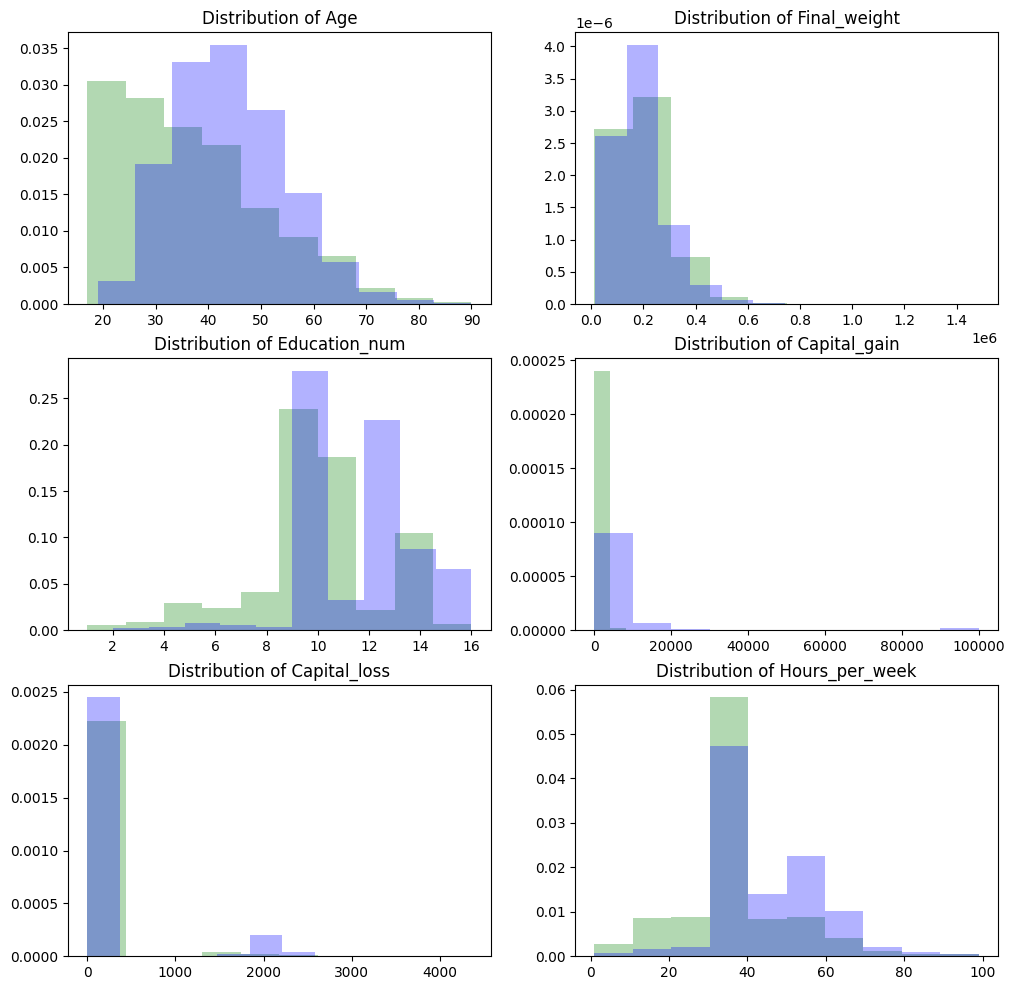

In [16]:
%matplotlib inline
plt.figure(figsize=(12, 12))

for i, var in enumerate(num_data.columns, start=1):
    plt.subplot(3, 2, i)
    plt.hist(data[data["Salary"] == " <=50K"][var], density=True, color="g", alpha=0.3)
    plt.hist(data[data["Salary"] == " >50K"][var], density=True, color="b", alpha=0.3)
    plt.title(f"Distribution of {var}")

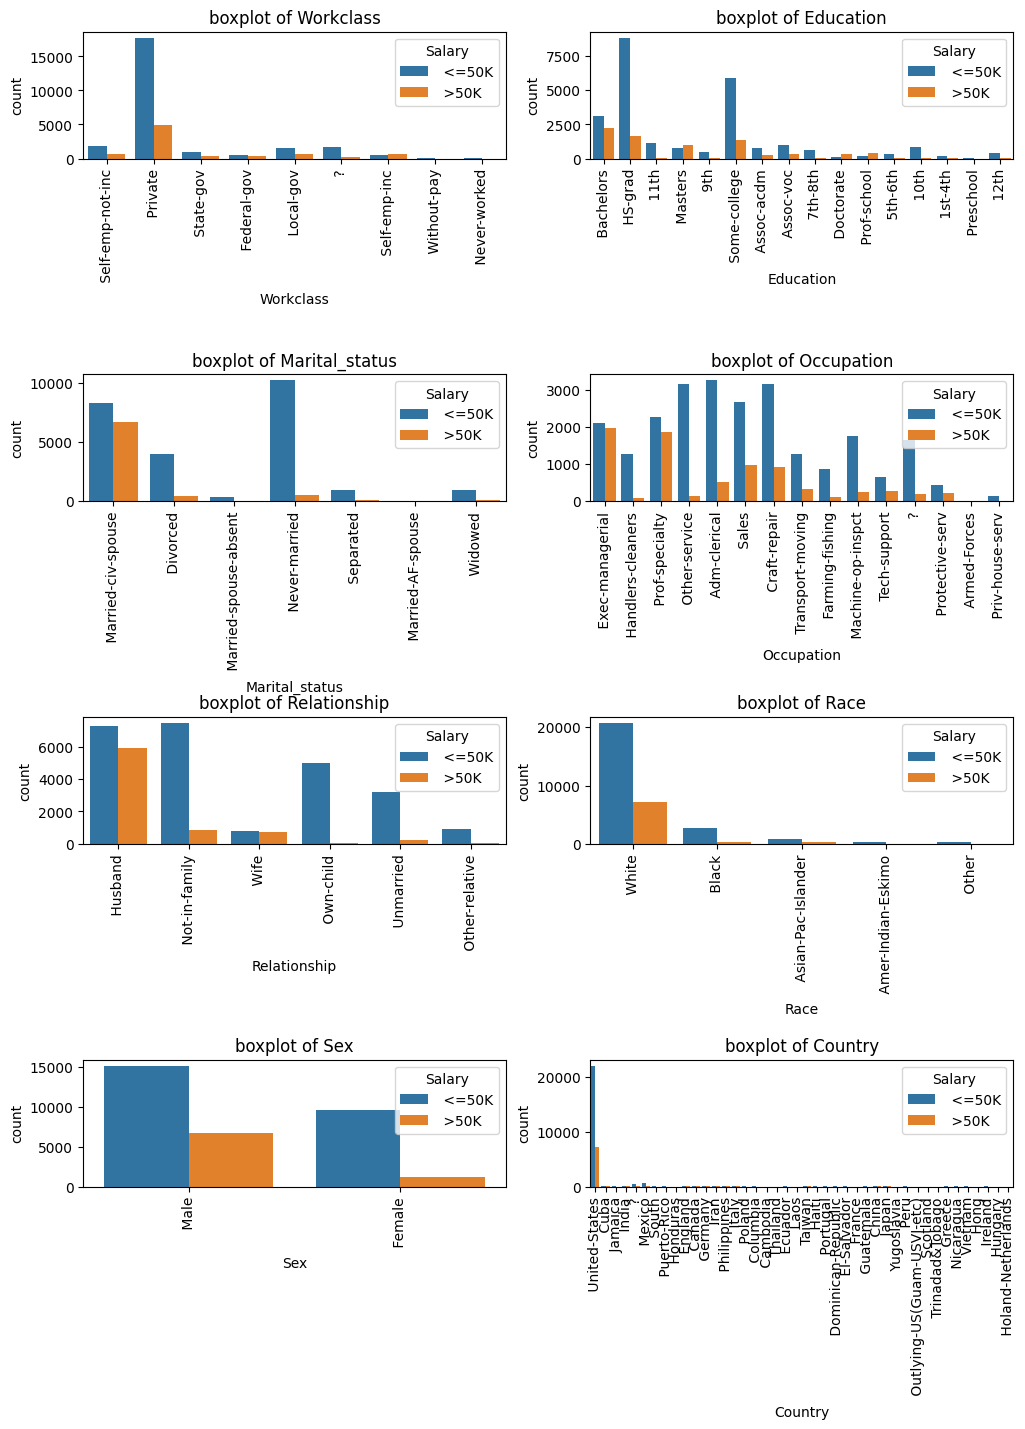

In [17]:
%matplotlib inline
import seaborn as sns

plt.figure(figsize=(12, 15))
for i, var in enumerate(cat_data.columns, start=1):
    plt.subplot(4, 2, i)
    plt.subplots_adjust(hspace=1.7)
    sns.countplot(x=var, data=data, hue="Salary")
    plt.title(f"boxplot of {var}")
    plt.xticks(rotation=90)

In [18]:
num_var = ["Age", "Education_num",'Capital_gain','Hours_per_week']
cat_var=['Race','Occupation', 'Education', 'Workclass', 'Sex','Marital_status']

In [19]:
data.columns

Index(['Age', 'Workclass', 'Final_weight', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Country', 'Salary'],
      dtype='object')

In [20]:
#encoding categories
from feature_engine.encoding import OrdinalEncoder, MeanEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

In [29]:
enc=MeanEncoder(ignore_format=True)
scaler=StandardScaler()
transformer=ColumnTransformer([('encode',enc,cat_var),('scale',scaler,num_var)])

In [30]:
transformer

ColumnTransformer(transformers=[('encode', MeanEncoder(ignore_format=True),
                                 ['Race', 'Occupation', 'Education',
                                  'Workclass', 'Sex', 'Marital_status']),
                                ('scale', StandardScaler(),
                                 ['Age', 'Education_num', 'Capital_gain',
                                  'Hours_per_week'])])

In [31]:
mapper={" <=50K":0," >50K":1}

In [32]:
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

model= LogisticRegression()

In [33]:
x=data.drop("Salary", axis=1)
y=data['Salary'].map(mapper)

In [34]:
from sklearn.pipeline import Pipeline
Pipe=Pipeline(steps=[('transform',transformer),('model',model)])

In [36]:
cross_validate(Pipe,x,y, scoring=['accuracy','precision','recall'],return_train_score=True)

{'fit_time': array([0.42834091, 0.3204658 , 0.35587835, 0.44163442, 0.37702131]),
 'score_time': array([0.03000164, 0.04147243, 0.03839159, 0.06025815, 0.0448122 ]),
 'test_accuracy': array([0.84106265, 0.83983415, 0.84398034, 0.84874079, 0.84398034]),
 'train_accuracy': array([0.84467138, 0.84478655, 0.84371161, 0.84286701, 0.84359644]),
 'test_precision': array([0.72152951, 0.71358828, 0.7254902 , 0.74150787, 0.7189232 ]),
 'train_precision': array([0.72692073, 0.7257085 , 0.72478563, 0.72217693, 0.72474438]),
 'test_recall': array([0.55357143, 0.55931122, 0.56632653, 0.57079082, 0.57871256]),
 'train_recall': array([0.56862745, 0.57149689, 0.56591742, 0.56480153, 0.56505102])}